In [119]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv('AMZN.csv',index_col=0,parse_dates=True)

In [181]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-15,547.750000,563.000000,547.000000,562.440002,562.440002,4937000
2015-10-16,565.270020,570.940002,560.309998,570.760010,570.760010,4315800
2015-10-19,570.760010,579.000000,567.380005,573.150024,573.150024,4375400
2015-10-20,572.000000,573.000000,555.280029,560.880005,560.880005,4346200
2015-10-21,563.869995,565.250000,552.520020,555.770020,555.770020,3343600


In [182]:
df = df.drop(columns=['Open','High','Low','Volume','Adj Close'])
df.head()

,Close
Date,
2015-10-15,562.440002
2015-10-16,570.760010
2015-10-19,573.150024
2015-10-20,560.880005
2015-10-21,555.770020


In [183]:
len(df)

1259

In [184]:
df = df.dropna()

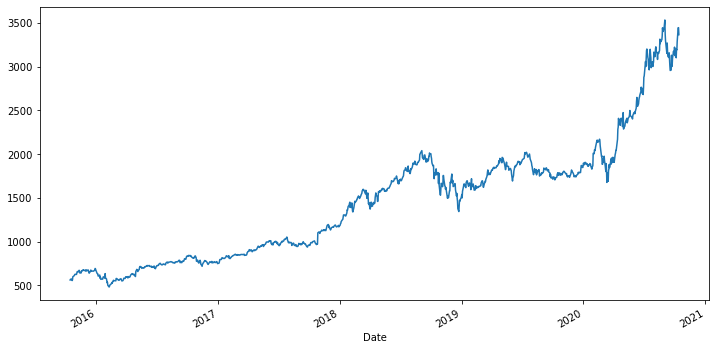

In [185]:
df['Close'].plot(figsize=(12,6))

In [186]:
df.index

DatetimeIndex(['2015-10-15', '2015-10-16', '2015-10-19', '2015-10-20',
               '2015-10-21', '2015-10-22', '2015-10-23', '2015-10-26',
               '2015-10-27', '2015-10-28',
               ...
               '2020-10-01', '2020-10-02', '2020-10-05', '2020-10-06',
               '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-12',
               '2020-10-13', '2020-10-14'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [187]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [188]:
adf_test(df['Close'])

Augmented Dickey-Fuller Test: 
ADF test statistic         1.370945
p-value                    0.996978
# lags used               14.000000
# observations          1244.000000
critical value (1%)       -3.435618
critical value (5%)       -2.863866
critical value (10%)      -2.568008
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [371]:
from pmdarima import auto_arima
fitted = auto_arima(df['Close'],seasonal=False,stationary=False,trace=True,start_p=0,start_q=0,max_p=6,max_q=3)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12388.677, Time=1.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12380.643, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12381.134, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12392.313, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12381.830, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12380.298, Time=1.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12382.296, Time=1.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12382.296, Time=1.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12382.382, Time=0.56 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12384.164, Time=1.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12384.671, Time=0.31 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 8.970 seconds


In [190]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6186.149
Date:                Fri, 16 Oct 2020   AIC                          12380.298
Time:                        13:44:02   BIC                          12400.847
Sample:                             0   HQIC                         12388.020
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.4070      1.372      2.484      0.013       0.718       6.096
ar.L1         -0.5282      0.121     -4.368      0.000      -0.765      -0.291
ma.L1          0.4437      0.129      3.449      0.001       0.192       0.696
sigma2      1093.3651     20.457     53.448      0.000    1053.271    1133.460
===================================================================================
Ljung-Box (Q):                      106.56   Jarque-Bera (JB):              2760.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              17.06   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

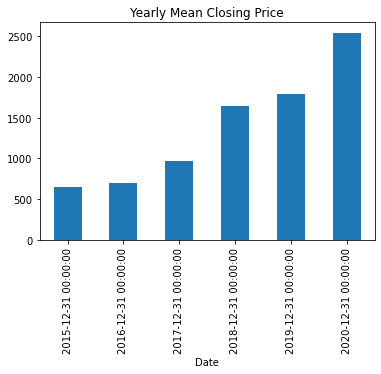

In [191]:
df['Close'].resample(rule='A').mean().plot.bar(title='Yearly Mean Closing Price')

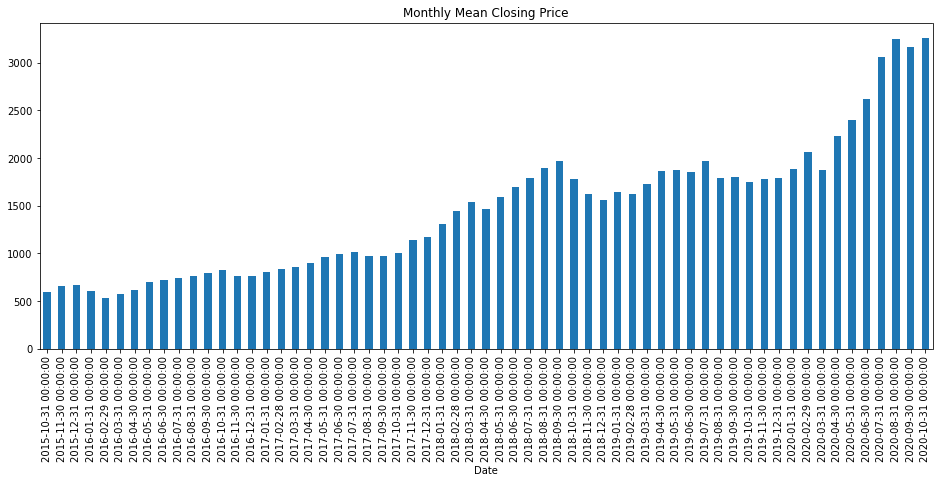

In [192]:
df['Close'].resample(rule='M').mean().plot.bar(figsize=(16,6),title='Monthly Mean Closing Price')

In [329]:
len(test)

378

In [223]:
train_len =int(0.7*len(df)) 
test_len = len(df)- train_len

train =df.iloc[:train_len]
test=df.iloc[train_len:]

In [277]:
from statsmodels.tsa.arima_model import ARIMA,ARMAResults, ARIMAResults
model = ARIMA(train,order=(1,1,1))
results = model.fit()
#results.summary()

In [263]:
predictions = results.predict(start=len(train),end=len(train)+len(test)-1,typ='levels').rename("ARIMA(1,1,1)")

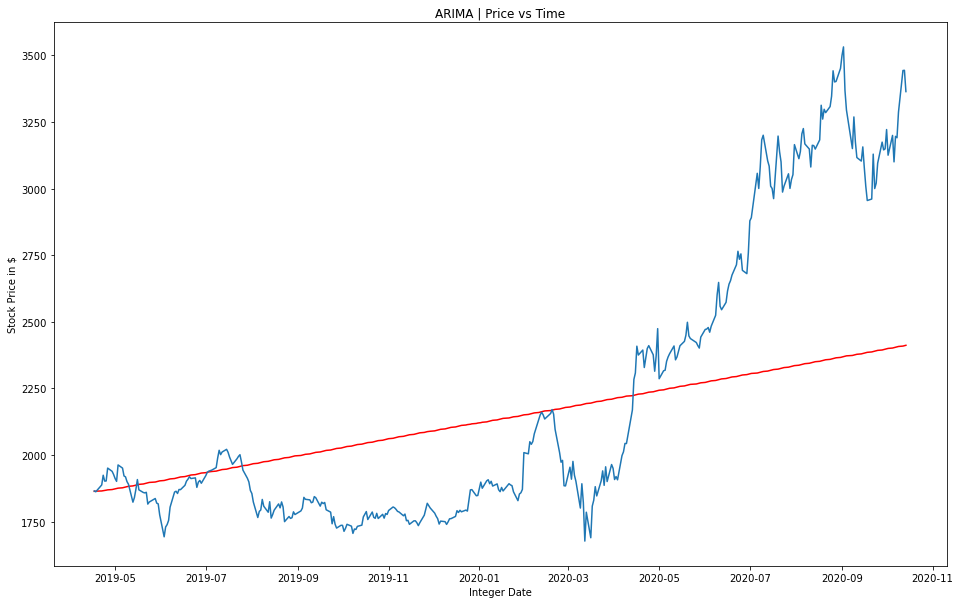

In [264]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('ARIMA | Price vs Time')
plt.plot(test.index, predictions, color='r', label='Predicted Price')
plt.plot(test.index,test['Close'], label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

In [369]:
#Performance Evaluation
from statsmodels.tools.eval_measures import rmse
error = rmse(test['Close'],predictions)
error

416.543793367004

In [267]:
test['Close'].mean()

2206.039231695767

In [268]:
predictions.mean()

2135.1253432221047

In [279]:
model = ARIMA(df['Close'],order=(1,1,1))

In [280]:
result=model.fit()

In [359]:
forecast = result.predict(start=len(df),end=len(df)+200,typ='levels').rename('FORECAST ')

In [360]:
indx = pd.date_range('2020-10-15',periods= len(forecast),freq='D')

In [361]:
forecast_1=pd.DataFrame(forecast)

In [362]:
forecast_1['Date'] = indx
forecast_1 = forecast_1.set_index('Date')
#forecast_1

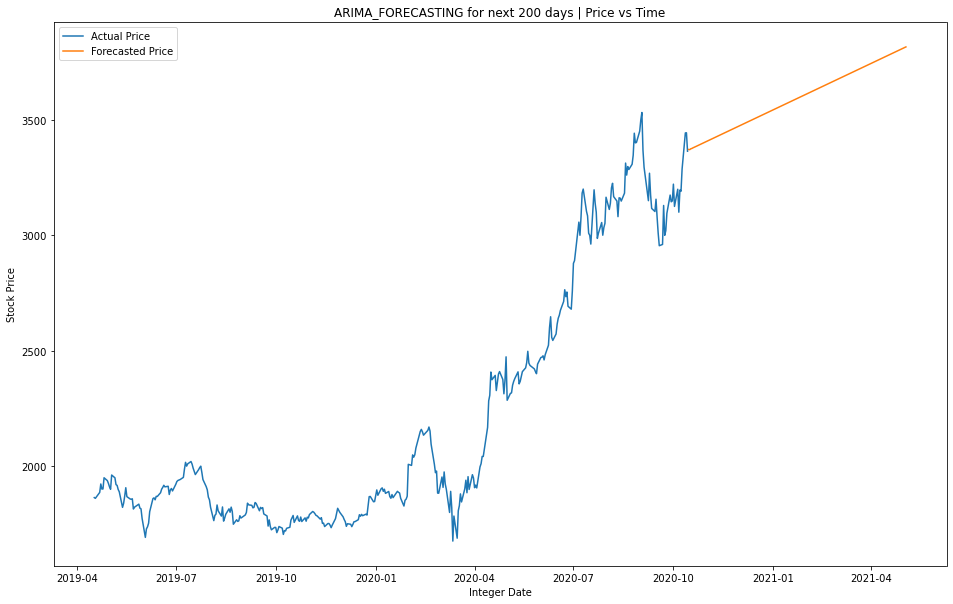

In [372]:
plt.figure(1, figsize=(16,10))
plt.title('ARIMA_FORECASTING for next 200 days | Price vs Time')
plt.plot(test.index, test,  label='Actual Price')
plt.plot(forecast_1.index, forecast_1, label='Forecasted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()